*Ewing et al (2020) Structural variants at the BRCA1/2 loci are a common source of homologous repair deficiency in high grade serous ovarian carcinoma.*

# Notebook 2 - Location and length of SVs 

The first part of this notebook provides the code for the analyses underlying Figure 1. 

The second part investigates whether the length of the deletions and inversions are associated with the biomodal distribution of HRDetect scores in the samples with deletions/inversions shown in Figure 3. 

## Tabulate high confidence SVs

In [ ]:
highconf<-read.csv("Supp1_highconf_SVs_PR_filter.060220.csv",stringsAsFactors=F)
co<-substr(highconf$Sample,1,2)
highconf$Cohort<-sapply(co,function(x) switch(x,"SH"="SHGSOC","DO"="TCGA","AO"="AOCS"))

Don't double count when large SVs also identified by Manta.

In [ ]:
highconf<-highconf[highconf$Double!=1,]

In [40]:
scot_highconf<-highconf[highconf$Cohort=="SHGSOC",]
aocs_highconf<-highconf[highconf$Cohort=="AOCS",]
tcga_highconf<-highconf[highconf$Cohort=="TCGA",]

In [41]:
scot_highconf<-scot_highconf[,c("Gene","Sample","Start_position","End_position","SV_length","SV_type","Caller")]
aocs_highconf<-aocs_highconf[,c("Gene","Sample","Start_position","End_position","SV_length","SV_type","Caller")]
tcga_highconf<-tcga_highconf[,c("Gene","Sample","Start_position","End_position","SV_length","SV_type","Caller")]
all_highconf<-rbind(scot_highconf,aocs_highconf,tcga_highconf)
rownames(all_highconf)<-seq(1,dim(all_highconf)[1])

In [ ]:
all_highconf$SV_length<-as.character(all_highconf$SV_length)
all_highconf$SV_length<-as.numeric(all_highconf$SV_length)
all_highconf[,"SV_length"]<-abs(all_highconf$SV_length)

df<-all_highconf[all_highconf$SV_type!="BND",]
df$length_kb<-df$SV_length /1000 
df$length_Mb<-df$SV_length /1000000 
df$Cohort<-substr(df$Sample,1,2)


## Calculate median lengths of deletions at BRCA1/2

In [ ]:
brca1dels<-df[df$Gene=="BRCA1" & df$SV_type=="DEL",]
summary(brca1dels$length_Mb)

brca2dels<-df[df$Gene=="BRCA2" & df$SV_type=="DEL",]
summary(brca2dels$length_Mb)


## Figure 1 

### Plot SV events at BRCA1 & BRCA2 by length.

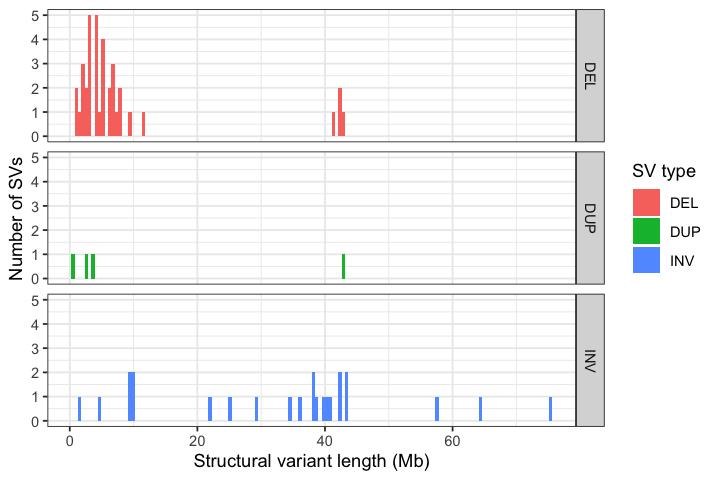

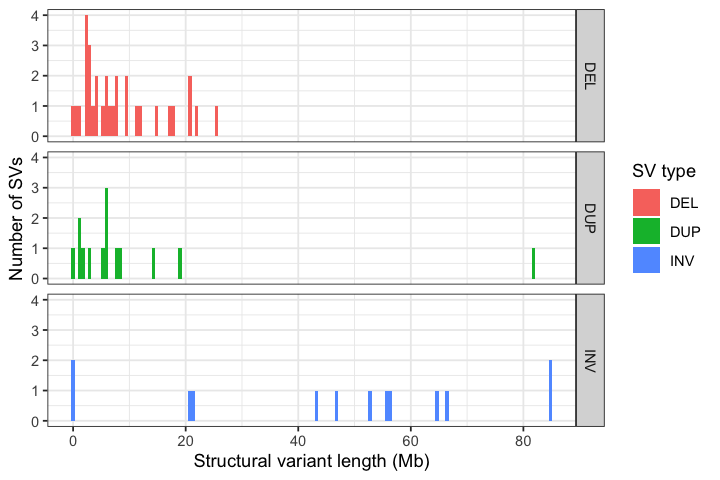

In [46]:
options(repr.plot.height=4,repr.plot.width=6)
library(ggplot2)
library(RColorBrewer)

    ggplot(df[df$Gene=="BRCA1",],aes(x=length_Mb,fill=SV_type))+geom_histogram(bins=144)+theme_bw()+ ylab("Number of SVs")+
    xlab("Structural variant length (Mb)")+facet_grid(SV_type~.)+scale_fill_discrete(name = "SV type")

    ggplot(df[df$Gene=="BRCA2",],aes(x=length_Mb,fill=SV_type))+geom_histogram(bins=144)+theme_bw()+ ylab("Number of SVs")+
    xlab("Structural variant length (Mb)")+facet_grid(SV_type~.)+scale_fill_discrete(name = "SV type")



### Build pile up plots of SVs overlapping BRCA1/2

In [47]:
library("IdeoViz")
library(karyoploteR)

all_highconf$chrom<-NA
all_highconf[all_highconf$Gene=="BRCA1","chrom"]<-"chr17"
all_highconf[all_highconf$Gene=="BRCA2","chrom"]<-"chr13"
all_highconf$y<-rownames(all_highconf)
noBNDs<-all_highconf[all_highconf$SV_type!="BND",]

df<-makeGRangesFromDataFrame(noBNDs,
                         keep.extra.columns=TRUE,
                         seqnames.field="chrom",
                         start.field="Start_position",
                         end.field="End_position",
                         starts.in.df.are.0based=FALSE)

In [48]:
df$y<-as.numeric(df$y)
gg_color_hue <- function(n) {
  hues = seq(15, 375, length = n + 1)
  hcl(h = hues, l = 65, c = 100)[1:n]
}

mypalette<- gg_color_hue(3)

In [49]:
df$Cohort<-substr(df$Sample,1,2)

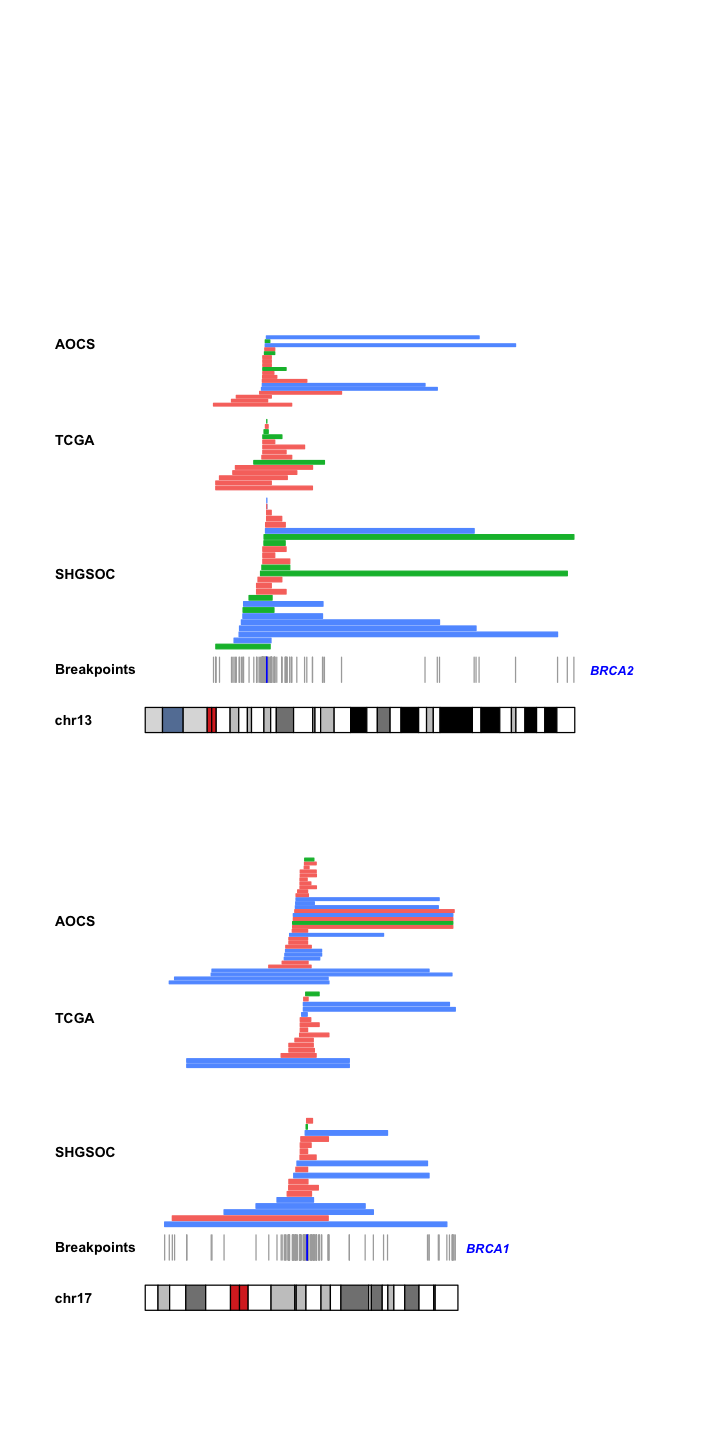

In [51]:
options(repr.plot.height=12,repr.plot.width=6)

pp <- getDefaultPlotParams(1)
pp$leftmargin <- 0.2
pp$rightmargin <- 0.2
pp$ideogramheight <-20
pp$data1height <-400

kp <- plotKaryotype(genome="hg38", chromosomes=c("chr13", "chr17"),cex=0.7,font=2,plot.params=pp)
tr.i <- 1/20
tr.o <- 1/15


tn <- 3
df_au<-df[df$Cohort=="AO",]
kpPlotRegions(kp, data=df[df$Cohort=="AO",], col=mypalette[as.factor(df_au$SV_type)],avoid.overlapping =TRUE,layer.margin = 0.01,
              r0=tr.o*tn+0.35, r1=tr.o*tn+0.6)
kpText(kp, chr="chr13", x=-24000000, y=9.5, adj=0,col="black", r0=tr.o*tn, r1=tr.o*tn+tr.i, labels="AOCS", cex=0.7,font=2)
kpText(kp, chr="chr17", x=-24000000, y=9.5, adj=0,col="black", r0=tr.o*tn, r1=tr.o*tn+tr.i, labels="AOCS", cex=0.7,font=2)

tn <- 2
df_do<-df[df$Cohort=="DO",]
kpPlotRegions(kp, data=df[df$Cohort=="DO",], col=mypalette[as.factor(df_do$SV_type)],avoid.overlapping =TRUE,layer.margin = 0.02,
              r0=tr.o*tn+0.25, r1=tr.o*tn+0.4)
kpText(kp, chr="chr13", x=-24000000, y=7, adj=0,col="black", r0=tr.o*tn, r1=tr.o*tn+tr.i, labels="TCGA", cex=0.7,font=2)
kpText(kp, chr="chr17", x=-24000000, y=7, adj=0,col="black", r0=tr.o*tn, r1=tr.o*tn+tr.i, labels="TCGA", cex=0.7,font=2)

tn <- 1
df_sh<-df[df$Cohort=="SH",]
kpPlotRegions(kp, data=df[df$Cohort=="SH",], col=mypalette[as.factor(df_sh$SV_type)],avoid.overlapping =TRUE,layer.margin = 0.01,
              r0=tr.o*tn, r1=tr.o*tn+0.3)
kpText(kp, chr="chr13", x=-24000000, y=3, adj=0,col="black", r0=tr.o*tn, r1=tr.o*tn+tr.i, labels="SHGSOC", cex=0.7,font=2)
kpText(kp, chr="chr17", x=-24000000, y=3, adj=0,col="black", r0=tr.o*tn, r1=tr.o*tn+tr.i, labels="SHGSOC", cex=0.7,font=2)

noBNDs_pos<-as.numeric(c(noBNDs$Start_position,noBNDs$End_position,43044295,43170245,32315474,32400266))
noBNDs_endpos<-noBNDs_pos+1
noBNDs_chr<-c(rep(noBNDs$chrom,2),"chr17","chr17","chr13","chr13")
col_ind<-c(rep("#AAAAAA",length(noBNDs_chr)-4),"blue","blue","blue","blue")
df2_in<-data.frame(chrom=noBNDs_chr,Start_position=noBNDs_pos,End_position=noBNDs_endpos)
df2<-makeGRangesFromDataFrame(df2_in,
                         keep.extra.columns=TRUE,
                         seqnames.field="chrom",
                         start.field="Start_position",
                         end.field="End_position",
                         starts.in.df.are.0based=FALSE)

tn <- 0

kpPlotRegions(kp, df2, col=col_ind, border=col_ind,r0=tr.o*tn, r1=tr.o*tn+tr.i,avoid.overlapping=F)
kpText(kp, chr="chr13", x=-24000000, y=0.5, adj=0,col="black", r0=tr.o*tn, r1=tr.o*tn+tr.i, labels="Breakpoints", cex=0.7,font=2)
kpText(kp, chr="chr13", x=130000000, y=0.5, adj=1,col="blue", r0=tr.o*tn, r1=tr.o*tn+tr.i, labels="BRCA2", cex=0.63,font=4)
kpText(kp, chr="chr17", x=-24000000, y=0.5, adj=0,col="black", r0=tr.o*tn, r1=tr.o*tn+tr.i, labels="Breakpoints", cex=0.7,font=2)
kpText(kp, chr="chr17", x=97000000, y=0.5, adj=1,col="blue", r0=tr.o*tn, r1=tr.o*tn+tr.i, labels="BRCA1", cex=0.63,font=4)


## Length of structural variants and HRDetect score

### Length of deletions and HRDetect score

In [ ]:
sampleInfo<-read.table("SampleInformation_full.txt",sep="\t",header=T)
singledels<-sampleInfo[sampleInfo$BRCAstatus=="Deletion overlapping exon (LOF)" & sampleInfo$BRCAstatus_SV=="Single deletion",]
singledels<-singledels[singledels$BRCA1_pro_meth!=1,]

In [ ]:
singledel_highconf<-highconf[highconf$Sample %in% singledels$Sample & highconf$SV_type=="DEL",]

singledels<-singledels[,c("Sample","HRDetect")]

In [78]:
singledel_highconf_hrd<-merge(singledel_highconf,singledels,by="Sample")

In [79]:
singledel_highconf_hrd$HRDeficient<-ifelse(singledel_highconf_hrd$HRDetect>0.7,1,0)

In [80]:
wilcox.test(as.numeric(singledel_highconf_hrd$SV_length)~as.factor(singledel_highconf_hrd$HRDeficient))


	Wilcoxon rank sum test

data:  as.numeric(singledel_highconf_hrd$SV_length) by as.factor(singledel_highconf_hrd$HRDeficient)
W = 33, p-value = 0.3809
alternative hypothesis: true location shift is not equal to 0


### Length of inversions and HRDetect score

In [ ]:
invs<-sampleInfo[sampleInfo$BRCA1status=="Inversion spanning gene (INV_SPAN)" & sampleInfo$BRCA1_pro_meth!=1
                 & sampleInfo$BRCA2status=="None",]


In [84]:
invs_highconf<-highconf[highconf$Sample %in% invs$Sample & highconf$SV_type=="INV",]
invs<-invs[,c("Sample","HRDetect","BRCA1_VST")]
invs_highconf_hrd<-merge(invs_highconf,invs,by="Sample")
invs_highconf_hrd<-invs_highconf_hrd[,c(25,26,1:14)]
invs_highconf_hrd

HRDetect,BRCA1_VST,Sample,Gene,Chromosome,Start_position,End_position,SV_length,SV_type,Caller,Fold_change,Log_fold_change,CNVkit_CN,CLImAT_CN,CLImAT_BAF,CLImAT_reliability
<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>
0.950709952,9.668975,AOCS_168,BRCA1,chr17,6402742,48915334,42512592,INV,Manta,NA,NA,NA,NA,NA,
0.001932990,NA,DO27978,BRCA1,chr17,41650630,43134061,1483431,INV,Manta,NA,NA,NA,NA,NA,
0.999951187,8.608967,SHGSOC032,BRCA1,chr17,35080930,44805787,9724857,INV,Manta,NA,NA,NA,NA,NA,
0.001229503,10.445889,SHGSOC044,BRCA1,chr17,29497238,58554851,29057613,INV,Manta,NA,NA,NA,NA,NA,
0.711287543,NA,SHGSOC074,BRCA1,chr17,5172881,80306809,75133928,INV,Manta,NA,NA,NA,NA,NA,
0.314530471,NA,SHGSOC085,BRCA1,chr17,40398734,75154944,34756210,INV,Manta,NA,NA,NA,NA,NA,
